# Cuaderno de Trabajo para Conversión Tiempo a Profundidad en 2D

**Autores**

- **Liliana Vargas Meleza** (lvargasm@imp.mx), Gerencia de Soluciones en Exploración, IMP
- **Douglas Gómez Reyes** (dagomez@imp.mx), Gerencia de Soluciones en Exploración, IMP
- **Juan Lara Corona** (jlara@imp.mx), Gerencia de Soluciones en Exploración, IMP
- **Sergio Chávez Pérez** (schavez@imp.mx), Dirección de Tecnología de Producto, IMP

## 1 Introducción a Madagascar 

La paquetería Madagascar provee un ambiente computacional de código abierto que permite manipular, procesar y visualizar datos sísmicos de manera gratuita (Fomel et al., 2013; Fomel, 2015; Oren y Nowack, 2018; <http://www.ahay.org>). Contiene una colección de módulos de cálculo, secuencias de procesamiento de datos y publicaciones científicas reproducibles. Es una de las principales plataformas para la reproducibilidad computacional en sismología de exploración para procesar datos sísmicos antes y después de apilar. Además, tiene un acervo de datos sísmicos públicos, disponibles gratuitamente. Algo a considerar es que graficar y manipular los datos con Madagascar implica un mayor esfuerzo intelectual, ya que requiere que el usuario tenga conocimientos básicos en programación con Python.

Para detalles sobre la instalación y uso de Madagascar ver la sección de Instrucciones y Requisitos del Manual de Operación asociado a este Anexo.



### 1.1 Consideraciones sobre Python 

Existen dos versiones de Python principales: Python 2.7 y Python 3.7. Ambas versiones tienen funcionalidades similares, la mayor diferencia está en la sintaxis y manejo de datos. El soporte para Python 2.7 es mínimo y se discontinuará en el futuro, mientras que Python 3.7.0 se encuentra en desarrollo continuo y es la preferida por los progrmadores. 

Uno de los problemas principales para ejecutar programas de Madagascar desde un cuaderno de trabajo (Jupyter Notebook, ver sección Prerequisitos del Manual de Operación) es la limitada manipulación de datos, debido a que su desarrollo es en Python 2.7. 

Los archivos de Madagascar (m8r) se encuentran en formato RSF y para manipularlos en Python se requiere de una interface que permita la comunicación entre estos lenguajes de programación. Esta interface se llama SWIG (_Simplified Wrapper and Interface Generator_) y es parte de la lista de paqueterías que contiene Anaconda 2 o 3 (Ver sección de Prerequisitos del Manual de Operación). Para instalar SIWG se escribe la siguiente instruccin en la terminal:  

**#>> conda install SWIG**


## 2. Descripción del Hito 3 

En el mercado existen diferentes opciones comerciales para llevar hacer conversión tiempo a profundidad, sin embargo, operan como cajas negras y el usuario tiene poco control del proceso. Por un lado, las soluciones comerciales involucran costos considerables por licenciamiento y, por otro lado, automatizan y trivializan la conversión de dominio. Por ello, proponemos el uso de herramientas computacionales de código abierto y gratuito para adaptar una técnica de trazado de rayos paraxiales como una alternativa para conversión tiempo a profundidad.

## 3. Conversión Tiempo a Profundidad 

Convertir datos sísmicos de tiempo a profundidad y viceversa es, para muchos profesionales de la
práctica, un proceso cotidiano y trivial en el ámbito petrolero. Tradicionalmente, las imágenes
sísmicas se migran en tiempo con un modelo de velocidad cuadrática media ($V_{RMS}$) y
para convertirlas a profundidad se usan velocidades de intervalo calculadas con la ecuación de Dix. Actualmente, existen técnicas de representación sísmica que pueden manejar datos sísmicos en geología estructuralmente compleja. Sin embargo, no siempre se puede obtener profundidades precisas. De hecho, Jones (2009) recomienda que las imágenes PSDM se transformen a tiempo, con una versión suavizada del modelo de velocidades PSDM y, posteriormente, convertirlas a profundidad de nuevo. Esto es porque los modelos de velocidad que son adecuados para apilar y migrar datos sísmicos no necesariamente reflejan la geología del subsuelo.

Imágenes PSTM requieren de un modelo de velocidad vertical condicionado por la geología para ser convertido a profundidad. Mientras que imágenes PSDM pueden tener profundidades menos precisas, pero la posición lateral de los eventos sísmicos es más precisa que en las imágenes PSTM, además de estar mejor enfocadas.

En este sentido, se tienen velocidades de procesamiento y velocidades de propagación (con significado físico). Procesamiento de datos y representación sísmica (_imaging_) se basan en modelos de velocidad que enfocan la imagen y son una representación simplificada de la geología. Mientras que conversión tiempo a profundidad requiere el uso de velocidades de propagación (Al-Chalabi, 2014). 


###  3. 1 Tipos de velocidad

#### Velocidad de propagación: Instantánea, de Intervalo y Promedio

La velocidad instantánea $(V_{INS})$ es la rapidez con la que se propaga un frente de onda en el subsuelo en un tiempo o profundidad determinado (Sherif, 2002). Es el valor límite al cual tiende la velocidad de intervalo de una capa infinitesimal. 

La velocidad de intervalo $(V_{INT})$ y la velocidad promedio $(V_{AVG})$son una integración de la velocidad instantánea a lo largo de una trayectoria de viaje, como se muestra en la siguiente imagen (Al-Chalabi, 2014). 

  <img src="velocities_inst_inter_avg.png" title="Figura 1. Velocidades físicas" width="600"/>

#### Velocidad de procesamiento: Velocidad de Apilamiento, de Migración y Cuadrática Media (RMS)

En la siguiente imagen se resumen los tipos de velocidad que se utilizan durante el procesamiento de datos sísmicos. En la práctica, la $V_{RMS}$ es un puente con las velocidades físicas y se usa para conversión T-P. Sin embargo, se debe tener en cuenta que estas velocidades representan un medio efectivo y simplifican la distribución de propiedades del subsuelo.

<img src="pro-vels.png" title="Figura 2. Velocidades de procesamiento" width="500"/>

Suponiendo que el subsuelo consiste de capas horizontales, paralelas e isótropas, y que la energía se propaga en dos dimensiones únicamente, las velocidades de intervalo se pueden obtener de velocidades de procesamiento (velocidad de apilamiento $(V_{STK})$ o de migración $(V_{PSTM})$). Bajo estas condiciones, la velocidad de apilamiento $(V_{STK})$ es aproximadamente igual a la velocidad cuadrática media $(V_{RMS})$.

Los modelos de velocidad para migrar datos sísmicos en tiempo se caracterizan por cambios verticales de velocidad, transicionales y suaves. Mientras que los modelos de velocidad para migración en profundidad toman en cuenta cambios de velocidad verticales y laterales abruptos. En la práctica, se recomienda 

Por lo que es incorrecto utilizar la relación de Dix inversa para convertir datos sísmicos de profundidad a tiempo, así como tampoco es correcto usar el modelo de velocidad de migración directamente, sino una versión suavizada (Jones, 2009). 

Ligeras variaciones en el modelo de velocidad usado para convertir a profundida datos sísmicos pueden causar distorsiones en la imagen, conocidas como efectos de levantamiento (_pull-up_), además de profundidades imprecisas. Por lo que es de gran relevancia elegir el método de conversión en función del modelo de velocidad y del objetivo de la conversión.



### 3.2 Rayos de Imagen

Técnicas de conversión tiempo a profundidad más complejas consideran los cambios de trayectoria de los rayos que se propagan en el subsuelo para obtener profundidades más precisas. Hubral y Krey (1980) introdujeron el concepto de rayo de imagen, que se define como el rayo de tiempo mínimo desde un punto difractor en el subsuelo su arribo perpendicular a la superficie. Alrededor del rayo de imagen hay un conjunto de rayos, cuya dispersión geométrica se conoce en un tiempo determinado $Q(x0,t0)$, como se ilustra en la siguiente figura.

<img src="rayos.png" title="Figura 3. Conversión a profundidad a partir de rayo de imagen" width="500"/>

Entonces, la velocidad de intervalo se puede calcular como la relación de la velocidad instantánea y el valor absoluto de la dispersión geométrica. Los rayos de imagen y sus correspondientes líneas ortogonales $e_i(t_i)$ son el sistema de coordenadas para convertir tiempos de viaje en profundidades. La complejidad de este método radica en la estimación de los tiempos de viaje a lo largo de los rayos de imagen y su localización en la superficie, para lo cual se implementan algoritmos de inversión. 

Cameron et al. (2008) implementaron un método de inversión recursivo para obtener profundidades mediante rayos de imagen. El resultado de su técnica es un sistema de coordenadas tiempo y profundidad, así como un modelo de velocidad de intervalo. El modelo de velocidad inicial para este cálculo es la velocidad de Dix en tiempo (velocidad de intervalo para capas horizontales). La inversión actualiza gradualmente el modelo de velocidad, incorporando la variación lateral de velocidad ignorada por el método de Dix tradicional.

<img src="synth.png" title="Figura 5. Conversión Tiempo a profundidad con rayos de imagen" width="600"/>

## 4 Migración en Profundidad vs Conversión a Profundidad

Es común que los intérpretes sísmicos confundan el proceso de migración en profundidad con conversión a profundidad. Conversión a profundidad consiste en convertir valores de tiempo de viaje a valores de profundidad usando un modelo de velocidad que tenga un significado físico. Mientras que migración en profundidad genera una imagen sísmica en el dominio de profundidad a partir de un modelo de velocidad que permite enfocar y posicionar reflectores sísmicos. Las profundidades obtenidas a través de migración son diferentes de las profundidades verdaderas en el subsuelo, porque el modelo de velocidad utilizado (velocidad de procesamiento) es una aproximación de la distribución de velocidades verdadera que carece de significado físico (Al-Chalabi, 2014).

Las diferencias entre estos procesos se resume en la siguiente tabla (Modificada de https://www.linkedin.com/pulse/imaging-vs-depth-conversion-rajeshwaran-dandapani/?trk=hp-feed-article-title-publish).
<img src="migracion.png" title="Figura 4. Comparación entre migración en profundidad y conversión a profundidad" width="600"/>


## 5 Flujo de trabajo

En este cuaderno de trabajo, adaptamos una técnica de conversión tiempo a profundidad mediante rayos de imagen. Esta técnica considera la desviación de trayectoria de los rayos debido a variaciones de velocidad verticales y horizontales. Estos experimentos computacionales los realizamos con la paquetería de Madagascar, con recursos computacionales que están al alcance de cualquier profesional.

### 5.1 Ejemplo de Conversión Tiempo a Profundidad

In [1]:
import m8r
import rsf.api
import numpy as np
import scipy.ndimage
import scipy.signal

import matplotlib.pyplot as plt

%matplotlib inline

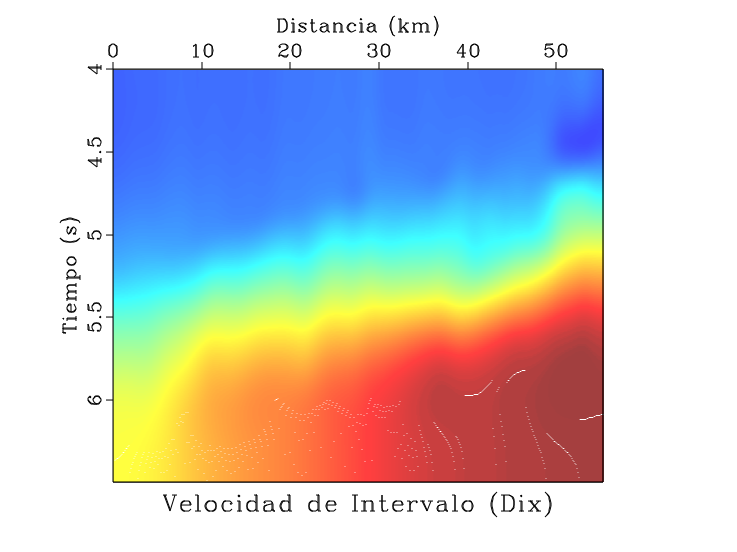

In [18]:
# Visualizar las gráficas generadas con Madagascar como imágenes 
m8r.Vplot('Fig/vel.vpl')

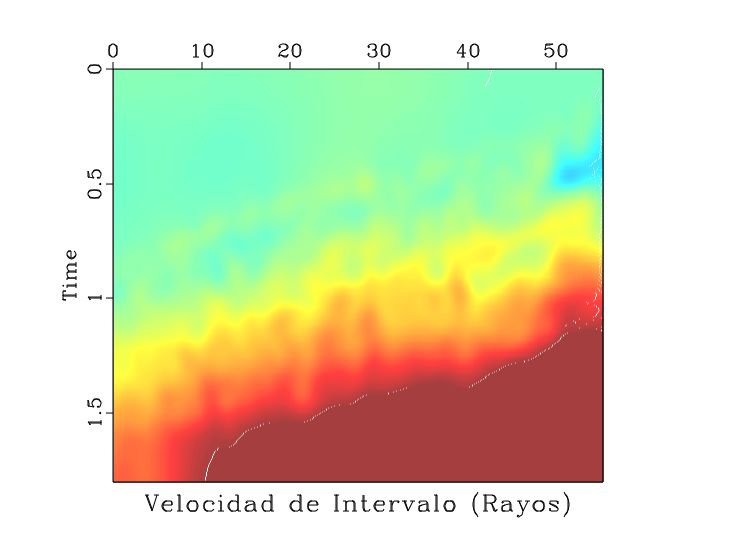

In [20]:
# Visualizar las gráficas generadas con Madagascar como imágenes 
m8r.Vplot('Fig/vcam.vpl')

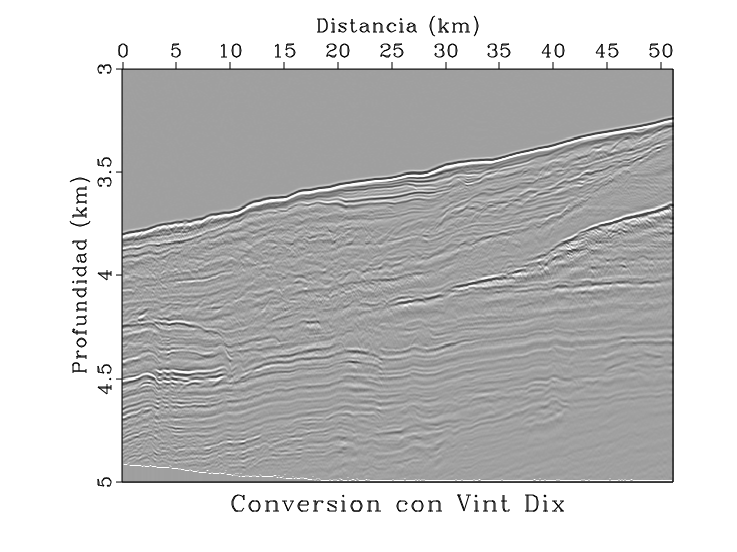

In [21]:
# Visualizar las gráficas generadas con Madagascar como imágenes 
m8r.Vplot('Fig/image.vpl')

### 5.2 Ejemplo de Conversión Profundidad a Tiempo 

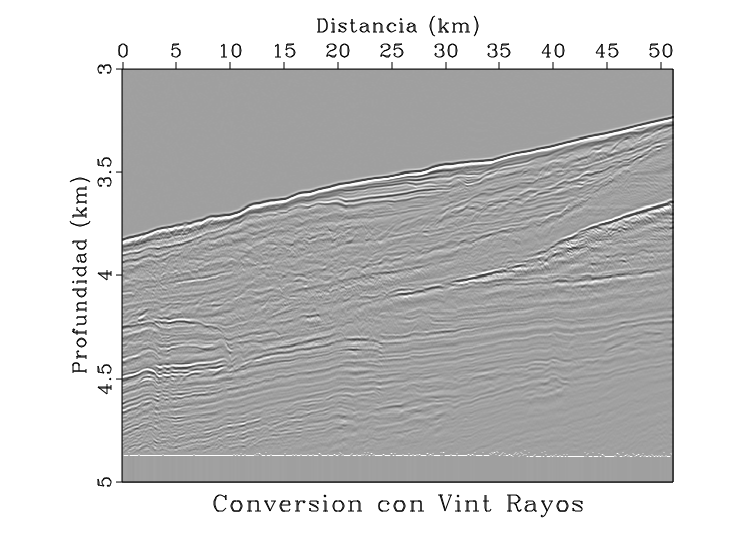

In [22]:
# Visualizar las gráficas generadas con Madagascar como imágenes 
m8r.Vplot('Fig/imagecam.vpl')

In [4]:
import m8r            # Esta biblioteca es válida para Python 2.7 únicamente
import rsf.api        # Permite usar la sintaxis de Madagascar en el ambiente python
import numpy as np
import scipy.ndimage
import scipy.signal

import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# con esta instrucción se ejecuta el documento de instrucciones SConstruct de Madagascar
#!pscons -Q    #--pscons para cálculos en paralelo   


Con las siguientes instrucciones se convierte un archivo *.rsf (Madagascar) en formato *.np (NumPy) para manipularlo y graficarlo con herramientas de Python. Esto permitiría graficar un registro de pozo sobre la sección sísmica, o bien manipular las amplitudes sísmicas. 

In [6]:
input = rsf.api.Input('cubo_z.rsf')
n1=input.int("n3") #inline
n2=input.int("n2") #xline
n3=input.int("n1") #tiempo
data = np.zeros((n1,n2,n3),'f')
input.read(data)
#data = data.transpose()
shape = data.shape
print (shape) 

(361, 391, 1601)


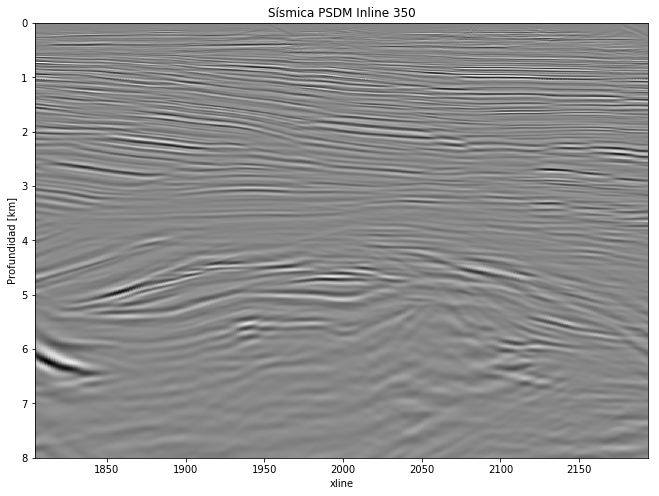

In [7]:
num_inline = 349   #f3=350
o2=1804
xline = np.linspace(1804, 2194, 391)  # start, end, num-points
prof = np.linspace(0,8,1601)

fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111)
#plt.pcolormesh(x, y, np.flipud(data[14,:,:].T))
plt.pcolormesh(xline, prof, data[num_inline,:,:].T, cmap='gray')
ax.set_aspect('auto')
ax.set_title(u'Sísmica PSDM Inline 350')
ax.set_xlabel('xline')
ax.set_ylabel('Profundidad [km]')
ax.set_ylim(8, 0)
plt.show()
fig.savefig('seccion_z_350.png')

In [8]:
input = rsf.api.Input('cubo_v.rsf')
n1=input.int("n3") #inline
n2=input.int("n2") #xline
n3=input.int("n1") #tiempo
v_data = np.zeros((n1,n2,n3),'f')
input.read(v_data)
#data = data.transpose()
shape = v_data.shape
print (shape) 

(361, 391, 1601)


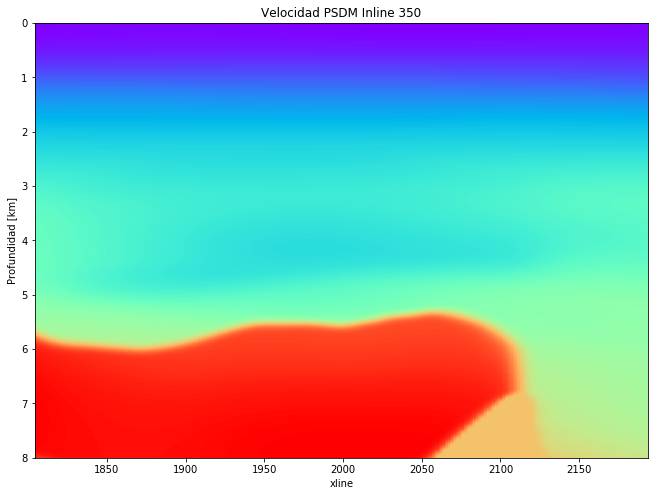

In [9]:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111)
plt.pcolormesh(xline, prof, v_data[num_inline,:,:].T, cmap='rainbow')
ax.set_aspect('auto')

ax.set_title(u'Velocidad PSDM Inline 350')
ax.set_xlabel('xline')
ax.set_ylabel('Profundidad [km]')
ax.set_ylim(8, 0)
plt.show()
fig.savefig('v_data_350.png')

In [10]:
input = rsf.api.Input('smooth_v.rsf')
#n1=input.int("n3") #inline
n2=input.int("n2") #xline
n3=input.int("n1") #
v_smooth = np.zeros((n2,n3),'f')
input.read(v_smooth)
#data = data.transpose()
shape = v_smooth.shape
print (shape) 

(391, 1601)


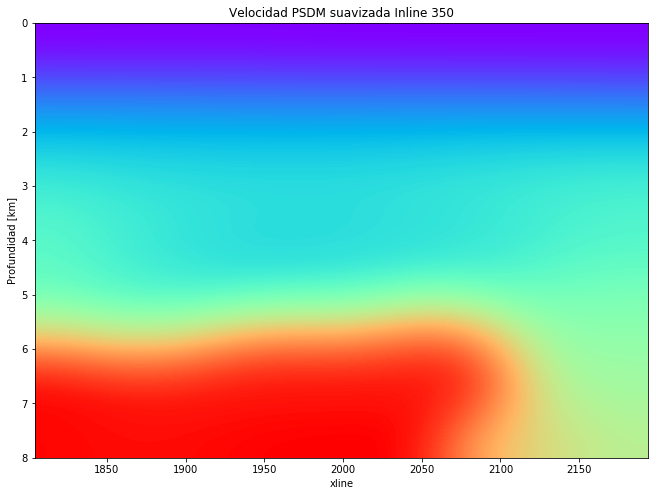

In [11]:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111)

plt.pcolormesh(xline, prof, v_smooth[:,:].T, cmap='rainbow')
ax.set_aspect('auto')

ax.set_title(u'Velocidad PSDM suavizada Inline 350')
ax.set_xlabel('xline')
ax.set_ylabel('Profundidad [km]')
ax.set_ylim(8, 0)
plt.show()
fig.savefig('v_smooth_350.png')

En este ejemplo, se desea convertir una sección sísmica de profundidad a tiempo con medio de trazado de rayos (Cameron et al., 2008). Para ello, contamos con el modelo de velocidades de migración PSDM que también está en profundidad. Por lo que, primero aplicamos un filtro de media para suavizar el modelos y luego convertirlo a tiempo.


In [12]:
input = rsf.api.Input('v_dixt1.rsf')
#n1=input.int("n3") #inline
n2=input.int("n2") #xline
n3=input.int("n1") #tiempo
v_dixt1 = np.zeros((n2,n3),'f')
input.read(v_dixt1)
#data = data.transpose()
shape = v_dixt1.shape
print (shape) 

(1250, 391)


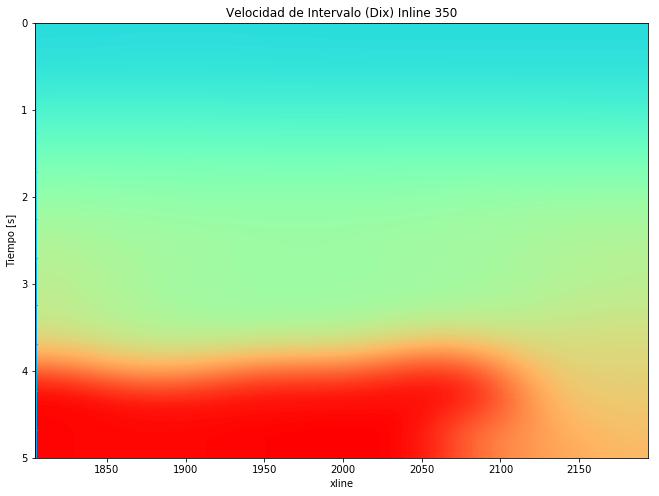

In [13]:
time = np.linspace(0,5,1250)

fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111)

plt.pcolormesh(xline, time, v_dixt1[:,:], cmap='rainbow')
ax.set_aspect('auto')

ax.set_title(u'Velocidad de Intervalo (Dix) Inline 350')
ax.set_xlabel('xline')
ax.set_ylabel('Tiempo [s]')
ax.set_ylim(5, 0)
plt.show()
fig.savefig('v_dixt1_350.png')

La velocidad de intervalo calculada con la ecuación de Dix es el modelo inicial para el proceso de inversión (metodo de Chebyshev; Cameron et al., 2008). 

In [14]:
input = rsf.api.Input('v_cam.rsf')
#n1=input.int("n3") #inline
n2=input.int("n2") #xline
n3=input.int("n1") #profundidad
v_cam1 = np.zeros((n2,n3),'f')
input.read(v_cam1)
#data = data.transpose()
shape = v_cam1.shape
print (shape) 

(1601, 391)


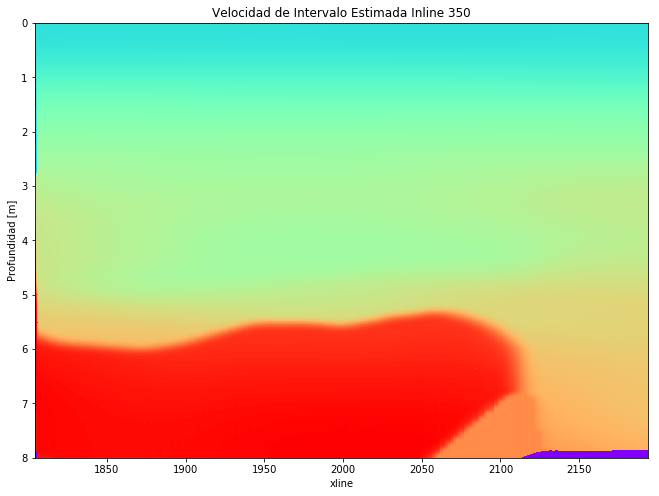

In [15]:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111)

plt.pcolormesh(xline, prof, v_cam1[:,:], cmap='rainbow')
ax.set_aspect('auto')

ax.set_title(u'Velocidad de Intervalo Estimada Inline 350')
ax.set_xlabel('xline')
ax.set_ylabel('Profundidad [m]')
ax.set_ylim(8, 0)
plt.show()
fig.savefig('v_cam1_350.png')

In [16]:
input = rsf.api.Input('seccion_t_conv2.rsf')
#n1=input.int("n3") #inline
n2=input.int("n2") #xline
n3=input.int("n1") #tiempo
sec_t2 = np.zeros((n2,n3),'f')
input.read(sec_t2)
#data = data.transpose()
shape = sec_t2.shape
print (shape) 

(391, 1205)


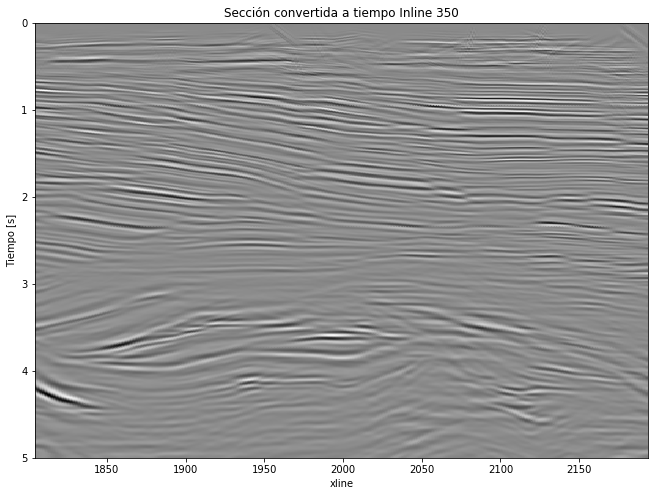

In [17]:
time2 = np.linspace(0,5,1205)

fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111)

plt.pcolormesh(xline, time2, sec_t2[:,:].T, cmap='gray')
ax.set_aspect('auto')

ax.set_title(u'Sección convertida a tiempo Inline 350')
ax.set_xlabel('xline')
ax.set_ylabel('Tiempo [s]')
ax.set_ylim(5, 0)
plt.show()
fig.savefig('sec_t2_350.png')

## 6 Referencias 

Al-Chalabi, M., 2014, Principles of seismic velocities and time-to-depth conversion: EAGE Publications.

Cameron, M., S. Fomel y J. Sethian, 2008, Time-to-depth conversion and seismic velocity estimation using time-migration velocity: Geophysics, Vol. 73, No. 5, VE205 - VE210. DOI: http://dx.doi.org/10.1190/1.2967501

Dix, C. H., 1955, Seismic velocities from surface measurements: Geophysics, Vol. 10, No.20, 68-86.

Fomel, S., 2015, Reproducible Research as a Community Effort: Lessons in the Madagascar Project: Computing in Science and Engineering, Vol. 7, 20-27.

Fomel, S., P. Sava, I. Vlad, Y. Liu, V. Bashkardin, 2013, Madagascar: open-source software project for multidimensional data analysis and reproducible computational experiments: Journal of Open Research Software, Vol 1 (e-8), 1-4.
(Disponible en http://openresearchsoftware.metajnl.com/articles/10.5334/jors.ag/)

Jones, I.F., 2009, Tutorial - Time conversion of depth migrated data: First Break, Vol. 27, No. 1, 51-55. 

Oren, C., y R.L. Nowack, 2018, An overview of reproducible 3D seismic data processing and imaging using Madagascar, Geophysics, Vol. 83, No. 2, F9-F20.

Francis, A., 2018, A Simple Guide to Seismic Depth Conversion Part I: GEOExPro, v.15, No. 2.

